# Table of Contents
1. Introduction
2. Import
3. Analysis & Preprocessing
4. Model
5. Training
6. Analysis & Conclusion

# 1. Introduction
References:
- https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
- https://www.analyticsvidhya.com/blog/2021/10/implementing-artificial-neural-networkclassification-in-python-from-scratch/

# 2. Import

In [60]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils, callbacks
from tensorflow.keras.optimizers import Adam
import matplotlib.axes as ax
from keras.layers import Dense, Activation, BatchNormalization
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.utils import np_utils
from keras.layers import Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix

# 3. Analysis & Preprocessing

In [44]:
data = pd.read_csv('../../data_sets/fetal_health.csv')

scaler = StandardScaler()

scaler.fit(data.drop('fetal_health', axis=1))
data_scaled = scaler.transform(data.drop('fetal_health', axis=1))

data_scaled = pd.DataFrame(data_scaled, columns = data.columns[:-1])

data.head(5)
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [45]:
data_scaled.head(5)
data_scaled.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
count,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,...,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03
mean,4.161509e-16,-1.803982e-16,-1.958452e-15,-2.625683e-15,-5.127706e-15,7.254767e-16,4.324961e-15,2.687304e-16,-2.481552e-16,2.291362e-15,...,8.564279e-17,-6.120326e-17,-4.047144e-17,2.408965e-16,8.397171e-17,6.141215e-17,-4.183964e-16,1.404751e-16,-3.634597e-17,5.783500e-16
std,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,...,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00
min,-2.775197e+00,-8.223883e-01,-2.032096e-01,-1.482465e+00,-6.384375e-01,-5.747560e-02,-2.687543e-01,-2.035639e+00,-1.282833e+00,-5.353613e-01,...,-1.731757e+00,-1.474609e+00,-2.342558e+00,-1.379664e+00,-4.584438e-01,-4.729191e+00,-3.951945e+00,-4.223849e+00,-6.492081e-01,-2.162031e+00
25%,-7.423728e-01,-8.223883e-01,-2.032096e-01,-8.034341e-01,-6.384375e-01,-5.747560e-02,-2.687543e-01,-8.720881e-01,-7.166031e-01,-5.353613e-01,...,-8.587648e-01,-8.993760e-01,-6.703135e-01,-7.013968e-01,-4.584438e-01,-5.160773e-01,-6.164580e-01,-6.285137e-01,-5.801731e-01,-5.245255e-01
50%,-3.088439e-02,-3.048813e-01,-2.032096e-01,-1.244037e-01,-6.384375e-01,-5.747560e-02,-2.687543e-01,1.169297e-01,-1.503732e-01,-5.353613e-01,...,-7.563980e-02,-1.960840e-02,-1.128988e-01,-3.622634e-01,-4.584438e-01,9.451891e-02,8.912573e-02,6.289690e-02,-4.075856e-01,-5.245255e-01
75%,6.806040e-01,7.301328e-01,-1.389076e-01,8.941419e-01,3.752430e-01,-5.747560e-02,-2.687543e-01,8.150599e-01,4.158567e-01,6.270688e-02,...,7.588376e-01,8.939964e-01,5.559989e-01,6.551369e-01,-4.584438e-01,6.440555e-01,6.664215e-01,6.851664e-01,1.792117e-01,1.112980e+00
max,2.713428e+00,4.093929e+00,1.010654e+01,3.610264e+00,4.429965e+00,1.739869e+01,8.208570e+00,2.327675e+00,6.417893e+00,4.412293e+00,...,2.812936e+00,2.213648e+00,4.123453e+00,4.724738e+00,1.370800e+01,3.025381e+00,3.039749e+00,3.312527e+00,8.635997e+00,1.112980e+00


In [46]:
encoder = LabelEncoder()
encoder.fit(data["fetal_health"])
encodedY = encoder.transform(data["fetal_health"])
data_labels = np_utils.to_categorical(encodedY)

In [67]:
# Split for validation --> train, val, test = 80/15/5
# train to test (val and test) --> include random shuffle
x_train, x_validation, y_train, y_validation = train_test_split(data_scaled, data_labels, test_size=0.20, random_state=33)

# (20% of total dataset -> 75% validation = 15% total, 25% validation = 5% total
# val and test --> include random shuffle
x_val, x_test, y_val, y_test = train_test_split(x_validation, y_validation, test_size=0.25, random_state=33)

print("x_train shape is:",x_train.shape)
print("y_train shape is:",y_train.shape, "\n")
print("x_val shape is:",x_val.shape)
print("y_val shape is:",y_val.shape, "\n")
print("x_test shape is:",x_test.shape)
print("y_test shape is:",y_test.shape)

x_train shape is: (1700, 21)
y_train shape is: (1700, 3) 

x_val shape is: (319, 21)
y_val shape is: (319, 3) 

x_test shape is: (107, 21)
y_test shape is: (107, 3)


# 4. Model

In [107]:
# end with 3 neurons for each class --> 1 (Normal), 2 (Suspect) and 3 (Pathological)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=x_train.shape[1], name='input'))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax', name='output'))

opt = Adam(learning_rate=0.001)

model.compile(
            loss='categorical_crossentropy',
            optimizer=opt,
            metrics= ['accuracy']
            )

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 16)                352       
                                                                 
 batch_normalization_57 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dropout_21 (Dropout)        (None, 16)                0         
                                                                 
 activation_57 (Activation)  (None, 16)                0         
                                                                 
 dense_58 (Dense)            (None, 32)                544       
                                                                 
 batch_normalization_58 (Bat  (None, 32)               128       
 chNormalization)                                    

# 5. Training

In [108]:
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", 
                                        patience=20, restore_best_weights = True)

In [109]:
hist = model.fit(x_train, y_train, batch_size=128, epochs=500, validation_data=(x_val, y_val),callbacks = [earlystopping])

Epoch 1/500
14/14 [==============================] - 2s 41ms/step - loss: 1.2047 - accuracy: 0.2982 - val_loss: 0.8998 - val_accuracy: 0.7837
Epoch 2/500
14/14 [==============================] - 0s 17ms/step - loss: 1.0276 - accuracy: 0.4182 - val_loss: 0.8732 - val_accuracy: 0.7743
Epoch 3/500
14/14 [==============================] - 0s 17ms/step - loss: 0.9096 - accuracy: 0.5494 - val_loss: 0.8520 - val_accuracy: 0.7900
Epoch 4/500
14/14 [==============================] - 0s 15ms/step - loss: 0.7968 - accuracy: 0.6824 - val_loss: 0.8284 - val_accuracy: 0.8088
Epoch 5/500
14/14 [==============================] - 0s 16ms/step - loss: 0.7227 - accuracy: 0.7459 - val_loss: 0.7979 - val_accuracy: 0.8370
Epoch 6/500
14/14 [==============================] - 0s 15ms/step - loss: 0.6708 - accuracy: 0.7941 - val_loss: 0.7657 - val_accuracy: 0.8527
Epoch 7/500
14/14 [==============================] - 0s 16ms/step - loss: 0.6168 - accuracy: 0.7994 - val_loss: 0.7308 - val_accuracy: 0.8589
Epoch 

14/14 [==============================] - 0s 14ms/step - loss: 0.2374 - accuracy: 0.8988 - val_loss: 0.2050 - val_accuracy: 0.9216
Epoch 59/500
14/14 [==============================] - 0s 15ms/step - loss: 0.2457 - accuracy: 0.9000 - val_loss: 0.2030 - val_accuracy: 0.9216
Epoch 60/500
14/14 [==============================] - 0s 15ms/step - loss: 0.2329 - accuracy: 0.9082 - val_loss: 0.2004 - val_accuracy: 0.9185
Epoch 61/500
14/14 [==============================] - 0s 14ms/step - loss: 0.2343 - accuracy: 0.9047 - val_loss: 0.2055 - val_accuracy: 0.9122
Epoch 62/500
14/14 [==============================] - 0s 14ms/step - loss: 0.2261 - accuracy: 0.9076 - val_loss: 0.1985 - val_accuracy: 0.9216
Epoch 63/500
14/14 [==============================] - 0s 14ms/step - loss: 0.2252 - accuracy: 0.9053 - val_loss: 0.1946 - val_accuracy: 0.9216
Epoch 64/500
14/14 [==============================] - 0s 17ms/step - loss: 0.2486 - accuracy: 0.8935 - val_loss: 0.1937 - val_accuracy: 0.9216
Epoch 65/500

14/14 [==============================] - 0s 15ms/step - loss: 0.1845 - accuracy: 0.9247 - val_loss: 0.1753 - val_accuracy: 0.9216
Epoch 116/500
14/14 [==============================] - 0s 14ms/step - loss: 0.1848 - accuracy: 0.9276 - val_loss: 0.1693 - val_accuracy: 0.9248
Epoch 117/500
14/14 [==============================] - 0s 15ms/step - loss: 0.1686 - accuracy: 0.9318 - val_loss: 0.1661 - val_accuracy: 0.9248
Epoch 118/500
14/14 [==============================] - 0s 15ms/step - loss: 0.1848 - accuracy: 0.9253 - val_loss: 0.1659 - val_accuracy: 0.9248
Epoch 119/500
14/14 [==============================] - 0s 14ms/step - loss: 0.1968 - accuracy: 0.9106 - val_loss: 0.1697 - val_accuracy: 0.9310
Epoch 120/500
14/14 [==============================] - 0s 14ms/step - loss: 0.1718 - accuracy: 0.9371 - val_loss: 0.1667 - val_accuracy: 0.9279
Epoch 121/500
14/14 [==============================] - 0s 15ms/step - loss: 0.1885 - accuracy: 0.9212 - val_loss: 0.1629 - val_accuracy: 0.9373
Epoch 

# 6. Analysis & Conclusion

In [110]:
metrics_df = pd.DataFrame(hist.history)
metrics_df.sample()

,loss,accuracy,val_loss,val_accuracy
118,0.196839,0.910588,0.169706,0.931035


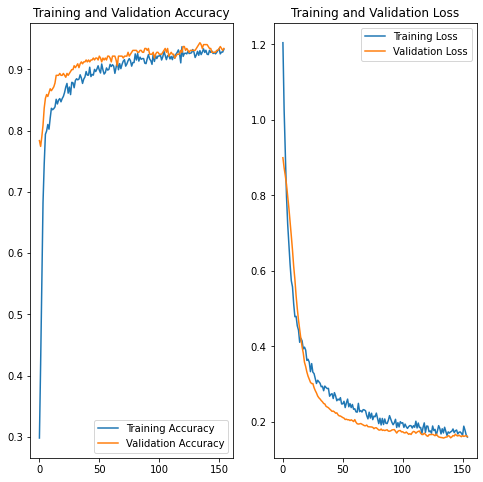

In [111]:
early_stop_epoch = 155

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(early_stop_epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [112]:
print(f'Avg Training Accuracy: {round(metrics_df.accuracy.mean() * 100, 4)}')
print(f'Avg Validation Accuracy: {round(metrics_df.val_accuracy.mean() * 100, 4)}')

Avg Training Accuracy: 89.0865
Avg Validation Accuracy: 91.4349


In [113]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 16ms/step - loss: 0.2257 - accuracy: 0.9346


[0.22571055591106415, 0.9345794320106506]

In [114]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_label = np.argmax(y_test, axis=1)

print(classification_report(y_label, y_pred, target_names=['normal', 'suspect', 'pathological'] ))

              precision    recall  f1-score   support

      normal       0.98      0.96      0.97        83
     suspect       0.78      0.82      0.80        17
pathological       0.86      0.86      0.86         7

    accuracy                           0.93       107
   macro avg       0.87      0.88      0.88       107
weighted avg       0.94      0.93      0.94       107



In [96]:
conf_mat = confusion_matrix(y_label, y_pred)
print(conf_mat)

[[82  1  0]
 [ 3 12  2]
 [ 0  1  6]]


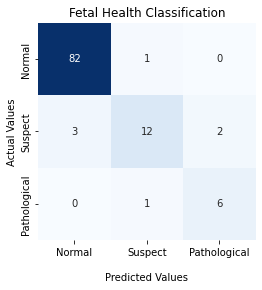

In [97]:
confusion = sb.heatmap(confusion_matrix(y_label, y_pred), square=True, annot=True, cmap='Blues', fmt='d', cbar=False )
confusion.set_title("Fetal Health Classification")
confusion.set_xlabel("\nPredicted Values")
confusion.set_ylabel("Actual Values")
confusion.xaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])
confusion.yaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])
plt.show()